In [1]:
import numpy as np
import numpy.ma as MA
from mpl_toolkits.basemap import Basemap
#from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seawater as sw
import cmocean
import math 
import re

from bs4 import BeautifulSoup
import requests
import os

%matplotlib inline

/home/john/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
#load functions 
%run /home/john/Documents/master_oceanography/physics/homework/ctd_functions.ipynb

# GET FILES

In [ ]:
#website where the data is located
url="http://www.oc.phys.uoa.gr/courses/ocprogs/"
username=#######
password=#######

In [3]:
_folder=['stu2_GKara/','transect_P_NS/','transect_A_WE/']

__figpath__='/home/john/Documents/master_oceanography/physics/homework/CTD_data/figs/'

#file archive path
arch='/home/john/Documents/master_oceanography/physics/homework/CTD_data/' 

In [ ]:
#download data
for f in folder:
    get_data(url+f,arch+f,username,password)

# Stations location and CTD profiles

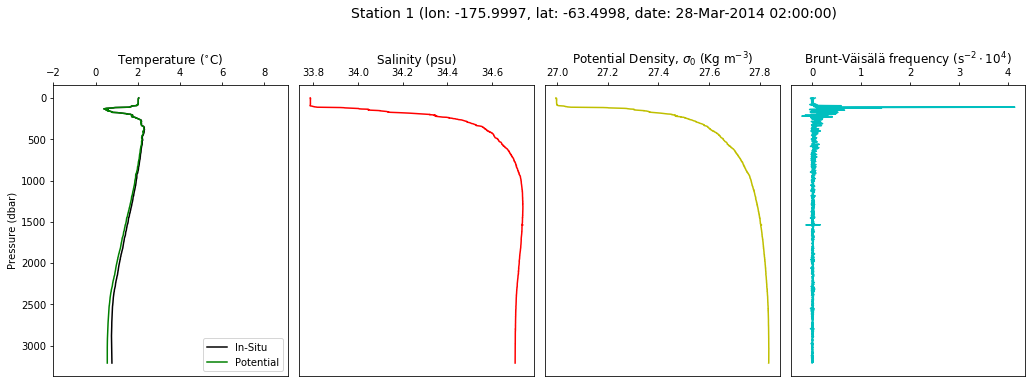

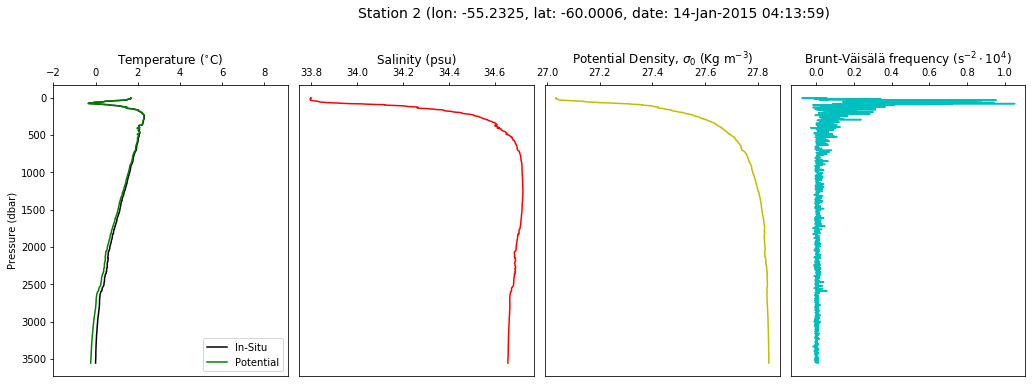

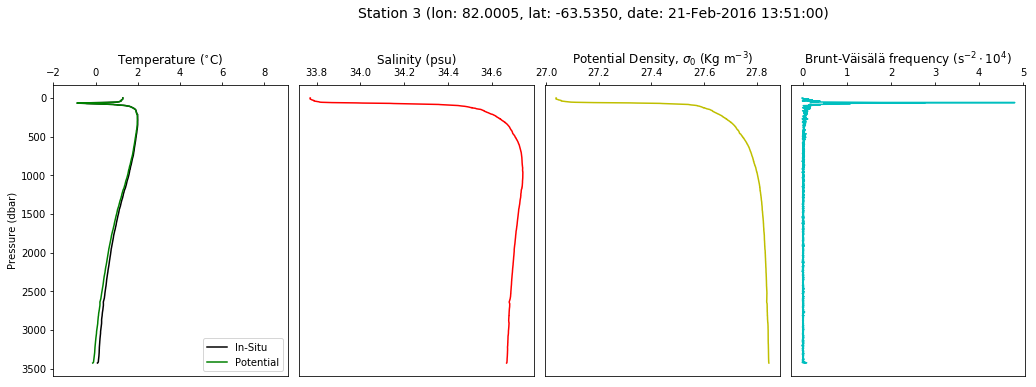

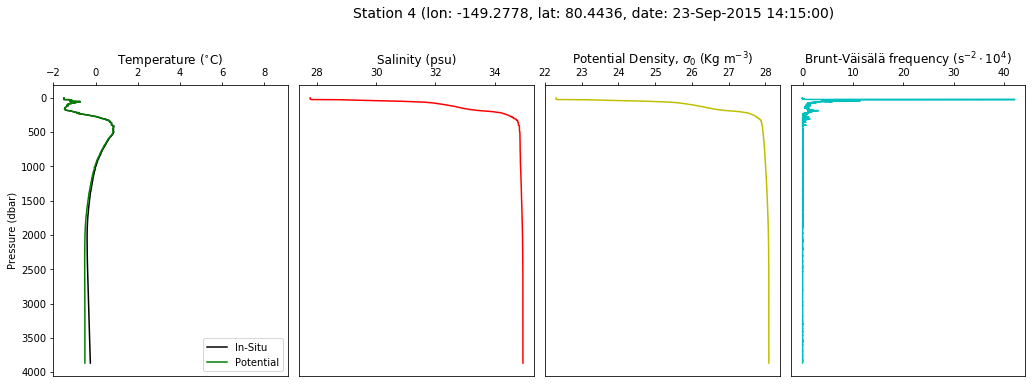

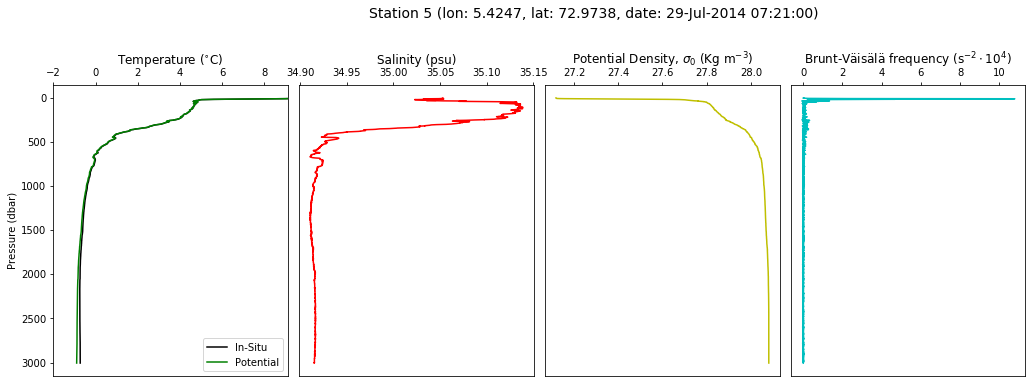

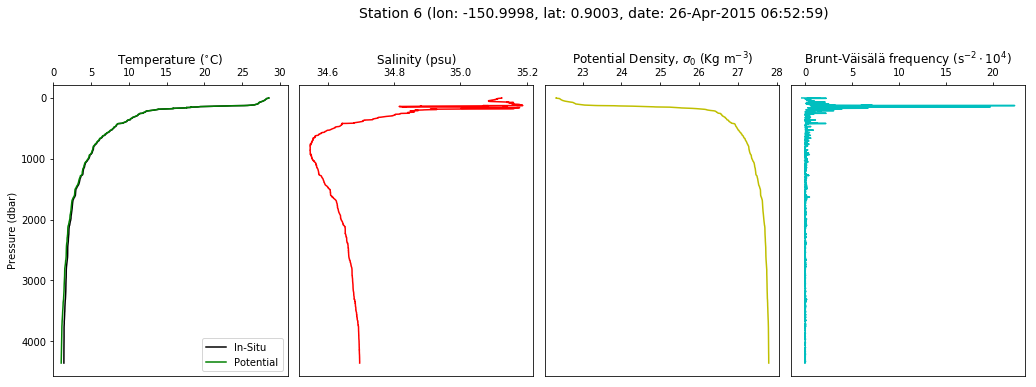

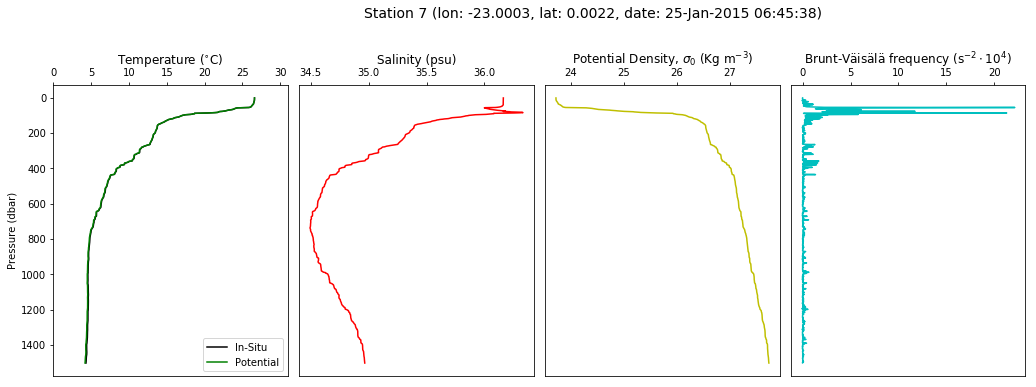

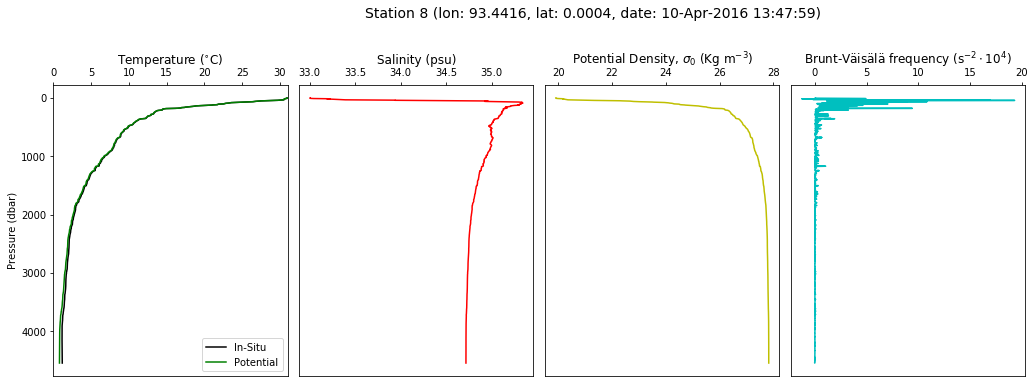

In [4]:
os.chdir(arch+_folder[0]) # dir where the data are located

# Initialize empty variables
lons,lats,labels,date_time=[],[],[],[]
#plot CTD profiles
for file in sorted(os.listdir(arch+_folder[0]), key=lambda x: (int(re.sub('\D','',x)),x)):
    lon,lat,date,time=read_header(arch+_folder[0]+file)
    lons.append(float(lon))
    lats.append(float(lat))
    label=file.split('_')[1].split('.')[0]
    labels.append(label)
    date_time.append(date+time)    
    data=read_data(file)
    fig1=ctd_profile(lon,lat,label,date,time,data['P'],data['T'],data['S'])
    #fig1.savefig(__figpath__+'CTD_'+label+'_profile.png',dpi=100,bbox_inches='tight')

/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


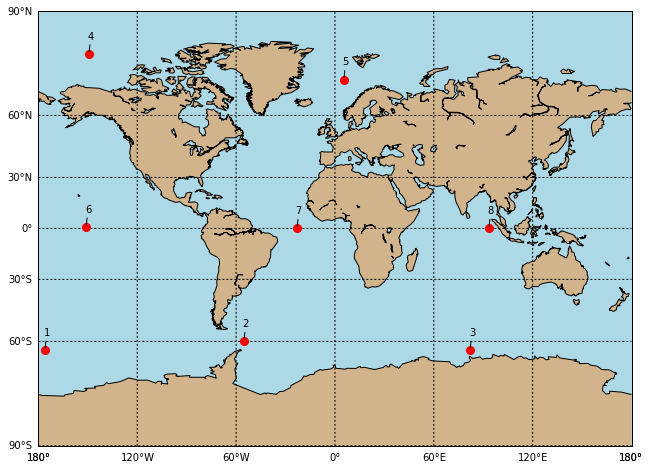

In [32]:
#plot stations location
fig = plt.figure(num=None, figsize=(12, 8) )
make_map(lons,lats,labels)
fig.savefig(__figpath__+'station_location.png',dpi=100,bbox_inches='tight')

# T-S diagram

/home/john/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:209: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/john/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:210: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


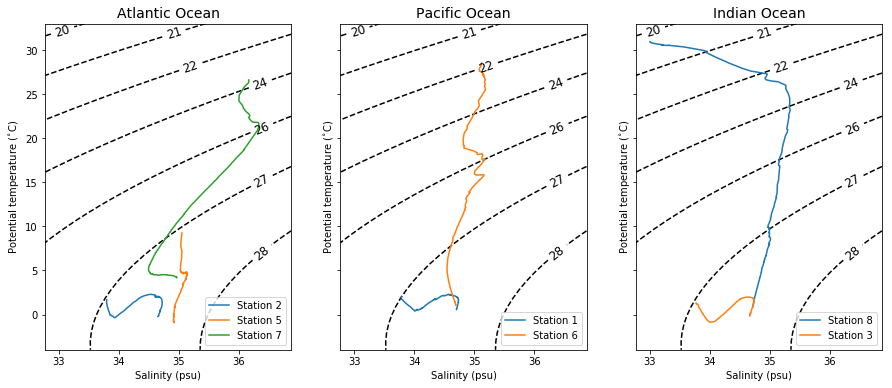

In [5]:
#create lists with stations over region
st=sorted(os.listdir(arch+_folder[0]), key=lambda x: (int(re.sub('\D','',x)),x)) #list of all stations
P_st=[st[0],st[5]] #sations in th Pacific ocean
A_st=[st[1],st[4],st[6]] #stations in th Atlantic ocean
I_st=[st[7],st[2]] #stations in th Indian ocean

#plot data
fig = plt.figure(figsize=(15,6))
ax1, ax2, ax3= fig.subplots(1,3,sharey=True)

#plot density isolines domain
dens_iso_domain([-2,30],[33,36.5],ax1)
dens_iso_domain([-2,30],[33,36.5],ax2)
dens_iso_domain([-2,30],[33,36.5],ax3)

#plot temperature,salinity
for file in P_st:
    data=read_data(file) 
    #calculate potential temperature
    theta=sw.ptmp(data['S'], data['T'], data['P'], pr=0)
    ax2.plot(data['S'],theta)
    ax2.legend(['Station 1','Station 6'],loc=4)
    ax2.set_title('Pacific Ocean',fontsize=14)
    
for file in A_st:
    data=read_data(file)
    #calculate potential temperature
    theta=sw.ptmp(data['S'], data['T'], data['P'], pr=0)
    ax1.plot(data['S'],theta)
    ax1.legend(['Station 2','Station 5','Station 7'],loc=4)
    ax1.set_title('Atlantic Ocean',fontsize=14)
    
for file in I_st:
    data=read_data(file)
    #calculate potential temperature
    theta=sw.ptmp(data['S'], data['T'], data['P'], pr=0)
    ax3.plot(data['S'],theta)
    ax3.legend(['Station 8','Station 3'],loc=4)
    ax3.set_title('Indian Ocean',fontsize=14)

#save figure
#fig.savefig(__figpath__+'TS_diagram_v1.png',dpi=100,bbox_inches='tight')

# Temperature and salinity sections

In [40]:
os.chdir(arch+_folder[1]) # Pacific ocean NS transect

# Initialize empty variables
lons,lats,date_time,Pmin,Pmax=[],[],[],[],[]

for file in os.listdir(arch+_folder[1]):
    lon,lat,date,time=read_header(arch+_folder[1]+file)
    lons.append(float(lon))
    lats.append(float(lat))
    date_time.append(date+time)
    data=read_data(file)
    #find Pressure min,max
    Pmin.append(data['P'].min())
    Pmax.append(data['P'].max())
l=np.array(lats) #  we make Hovmöller plot (latitude-pressure) 

In [41]:
#create 2-D masked arrays
pgrid = np.arange(int(min(Pmin)), int(max(Pmax)), 1) # 1-dbar intervals 
nd = len(pgrid) #max number of sampling received
ncr=len(sorted(os.listdir(arch+_folder[1]), key=lambda x: (int(re.sub('\D','',x)),x))) # total number of casts

#create masked array for temperature and salinity
temp = MA.masked_all((nd,ncr), dtype='float')
sal = MA.masked_all((nd,ncr), dtype='float')

for j,file in enumerate(os.listdir(arch+_folder[1])):
    data=read_data(file)
    n=data['P'].shape[0]
    i=np.where(sorted(l)==l[j])[0][0] #index by ascending latitude
    if (temp[1,i]!='--'):i=i+1 # we have casts with same latitude
    temp[:n,i]=data['T']
    sal[:n,i]=data['S']

In [42]:
#find min,max values of data
print('Temperature: ',temp.min(), temp.max())
print('Salinity: ',sal.min(), sal.max())

Temperature:  -1.32120001316 29.295999527
Salinity:  32.3586997986 36.4481010437


/home/john/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/john/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was d

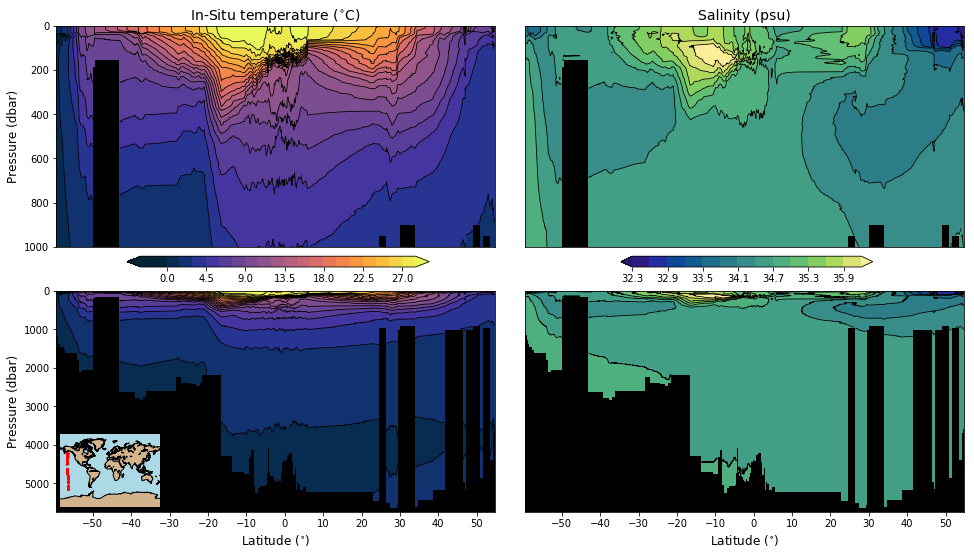

In [61]:
#plot sections
fig = plt.figure(figsize=(14,10))
ax1 =fig.add_subplot(221,axisbg='k')
ax2 =fig.add_subplot(222,axisbg='k')
ax3 =fig.add_subplot(223,axisbg='k')
ax4 =fig.add_subplot(224,axisbg='k')

#plot temperature
#zoom on layer 0-1000 dbar 
tlevs = np.arange(-3,29, 1.5)
im1=ax1.contourf(sorted(l),pgrid,temp,levels=tlevs,vmin=-1,vmax=29, extend='both', cmap=cmocean.cm.thermal)
ax1.contour(sorted(l),pgrid,temp,tlevs,linewidths=.8, colors='k')
ax1.set_title('In-Situ temperature ($^{\circ}$C)',fontsize=14)
ax1.set_ylabel('Pressure (dbar)',fontsize=12)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylim(1000,0)
ax1.xaxis.set_visible(False) # This erases the x ticks
###total layer
ax3.contourf(sorted(l),pgrid,temp,levels=tlevs,vmin=-1,vmax=29, extend='both', cmap=cmocean.cm.thermal)
ax3.contour(sorted(l),pgrid,temp,tlevs,linewidths=.8, colors='k')
ax3.set_ylim(ax1.get_ylim()[::-1])
ax3.set_ylabel('Pressure (dbar)',fontsize=12)
ax3.set_xlabel('Latitude ($^{\circ}$)',fontsize=12)
ax3.set_ylim(5740,0)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(10))

#plot salinity
#zoom on layer 0-1000 dbar 
slevs = np.arange(32.3, 36.4, 0.3)
im2=ax2.contourf(sorted(l),pgrid,sal,levels=slevs,vmin=32.3,vmax=36.4, extend='both',cmap=cmocean.cm.haline)
ax2.contour(sorted(l),pgrid,sal,levels=slevs,linewidths=.8, colors='k')
ax2.set_title('Salinity (psu)',fontsize=14)
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_ylim(1000,0)
ax2.xaxis.set_visible(False) # This erases the x ticks
ax2.yaxis.set_visible(False) # This erases the y ticks
###total layer
ax4.contourf(sorted(l),pgrid,sal,levels=slevs,vmin=32.3,vmax=36.4, extend='both', cmap=cmocean.cm.haline)
ax4.contour(sorted(l),pgrid,sal,levels=slevs,linewidths=.8, colors='k',linewidth=1)
ax4.set_ylim(ax1.get_ylim()[::-1])
ax4.set_ylim(5740,0)
ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.set_xlabel('Latitude ($^{\circ}$)',fontsize=12)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(10))

fig.subplots_adjust(left=0, wspace=0.07, top=0.8)
#make colorbars
cbar1_ax = fig.add_axes([.07, .465, .3, .015])
cbar2_ax = fig.add_axes([.56, .465, .25, .015])
plt.colorbar(im1, cax=cbar1_ax, orientation='horizontal')
plt.colorbar(im2, cax=cbar2_ax, orientation='horizontal')
#make transect location map
tr_ax = fig.add_axes([.003, .115,.1, .135])
m=make_map(lons,lats,'')
#save fig
#fig.savefig(__figpath__+'P_section.png',dpi=100,bbox_inches='tight')

In [62]:
os.chdir(arch+_folder[2]) # Atlantic ocean WE transect

# Initialize empty variables
lons,lats,date_time,Pmin,Pmax=[],[],[],[],[]

for file in os.listdir(arch+_folder[2]):
    lon,lat,date,time=read_header(arch+_folder[2]+file)
    lons.append(float(lon))
    lats.append(float(lat))
    date_time.append(date+time)
    data=read_data(file)
    #find Pressure min,max
    Pmin.append(data['P'].min())
    Pmax.append(data['P'].max())
l=np.array(lons) #  we make Hovmöller plot (latitude-pressure) 

In [63]:
#create 2-D masked arrays
pgrid = np.arange(int(min(Pmin)), int(max(Pmax)), 2) # 2-dbar intervals 
nd = len(pgrid) #max number of sampling received
ncr=len(sorted(os.listdir(arch+_folder[2]), key=lambda x: (int(re.sub('\D','',x)),x))) # total number of casts

#create masked array for temperature and salinity
temp = MA.masked_all((nd,ncr), dtype='float')
sal = MA.masked_all((nd,ncr), dtype='float')

for j,file in enumerate(os.listdir(arch+_folder[2])):
    data=read_data(file)
    n=data['P'].shape[0]
    i=np.where(sorted(l)==l[j])[0][0] #index by ascending longitude
    temp[:n,i]=data['T']
    sal[:n,i]=data['S']

In [64]:
#find min,max values of data
print('Temperature: ',temp.min(), temp.max())
print('Salinity: ',sal.min(), sal.max())

Temperature:  2.0216999054 26.8672008514
Salinity:  34.8420982361 37.5271987915


In [65]:
max(Pmax)


6235.0

/home/john/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/john/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecation

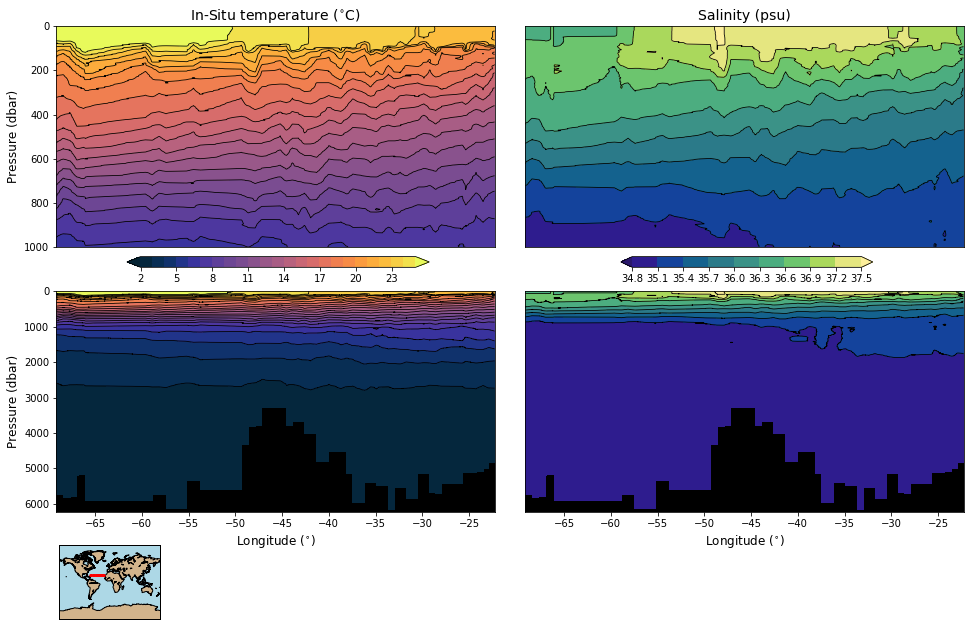

In [72]:
#plot sections
fig = plt.figure(figsize=(14,10))
ax1 =fig.add_subplot(221,axisbg='k')
ax2 =fig.add_subplot(222,axisbg='k')
ax3 =fig.add_subplot(223,axisbg='k')
ax4 =fig.add_subplot(224,axisbg='k')

#plot temperature
#zoom on layer 1-1000 dbar 
tlevs = np.arange(2,26, 1)
im1=ax1.contourf(sorted(l),pgrid,temp,levels=tlevs, vmin=2,vmax=26,extend='both', cmap=cmocean.cm.thermal)
ax1.contour(sorted(l),pgrid,temp,levels=tlevs,linewidths=.8, colors='k')
ax1.set_title('In-Situ temperature ($^{\circ}$C)',fontsize=14)
ax1.set_ylabel('Pressure (dbar)',fontsize=12)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylim(1000,0)
ax1.xaxis.set_visible(False) # This erases the x ticks
###total layer
ax3.contourf(sorted(l),pgrid,temp,levels=tlevs,vmin=2,vmax=26,extend='both', cmap=cmocean.cm.thermal)
ax3.contour(sorted(l),pgrid,temp,levels=tlevs,linewidths=.8, colors='k')
ax3.set_ylim(ax1.get_ylim()[::-1])
ax3.set_ylabel('Pressure (dbar)',fontsize=12)
ax3.set_xlabel('Longitude ($^{\circ}$)',fontsize=12)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax3.set_ylim(6235,0)

#plot salinity
#zoom on layer 0-1000 dbar 
slevs = np.arange(34.8, 37.5, 0.3)
im2=ax2.contourf(sorted(l),pgrid,sal,levels=slevs, vmin=34.8,vmax=37.5, extend='both',cmap=cmocean.cm.haline)
ax2.contour(sorted(l),pgrid,sal,levels=slevs,linewidths=.8, colors='k')
ax2.set_title('Salinity (psu)',fontsize=14)
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_ylim(1000,0)
ax2.xaxis.set_visible(False) # This erases the x ticks
ax2.yaxis.set_visible(False) # This erases the y ticks
###total layer
ax4.contourf(sorted(l),pgrid,sal,levels=slevs,vmin=34.8,vmax=37.5,extend='both', cmap=cmocean.cm.haline)
ax4.contour(sorted(l),pgrid,sal,levels=slevs,linewidths=.8, colors='k')
ax4.set_ylim(ax1.get_ylim()[::-1])
ax4.set_ylim(6235,0)
ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.set_xlabel('Longitude ($^{\circ}$)',fontsize=12)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(5))


fig.subplots_adjust(left=0, wspace=0.07, top=0.8)
#make colorbars
cbar1_ax = fig.add_axes([.07, .465, .3, .015])
cbar2_ax = fig.add_axes([.56, .465, .25, .015])
plt.colorbar(im1, cax=cbar1_ax, orientation='horizontal')
plt.colorbar(im2, cax=cbar2_ax, orientation='horizontal')
#make transect location map
tr_ax = fig.add_axes([.003, -.04,.1, .135])
m=make_map(lons,lats,'')
#save fig
#fig.savefig(__figpath__+'A_section.png',dpi=100,bbox_inches='tight')